In [ ]:
############################################################################################################################
# Tache 1:Etude du dataset sur l'avc
# Source:https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [ ]:
# Informations sur les attributs
1) id: identificateur unique 
2) sexe: « Mâle », « Femme » ou « Autre » 
3) âge: âge du patient 
4) hypertension:0 si le patient n’a pas d’hypertension, 1 si le patient a l’hypertension 
5) heart_disease: 0 si le patient n’a pas de maladies cardiaques, 1 si le patient a une maladie cardiaque 
6) ever_married :« Non » ou « Oui» 
7) work_type :« enfants », « Govt_jov », « Never_worked », « privé » ou « travailleur autonome » 
8) Residence_type : « Rural » ou « Urbain » 
9) avg_glucose_level : taux moyen de glucose dans le sang 
10)bmi: indice de masse corporelle 
11)smoking_status: « anciennement fumé », « jamais fumé », « fume » ou « Inconnu"* 
12)accident vasculaire cérébral: 1 si le patient a eu un accident vasculaire cérébral ou 0 sinon



In [ ]:
# Objectifs
# Cet ensemble de données est utilisé pour prédire si un patient est susceptible d’avoir un AVC en fonction des paramètres d’entrée comme le sexe, l’âge, diverses maladies et l’état de tabagisme


In [ ]:
#Plan
# 1- Import des Packages
# 2- Analyse exploratoire de données
# 3- Conclusions de l'analyse exploratire de données
# 4- Entrainement de modèles de ML/DL et Evaluation du modèle grave aux métriques
# 5- Validation croisée et courbe d'apprentissage
# 7- Conclusion

In [ ]:
# 1- Import des Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,GradientBoostingClassifier
from sklearn.svm import  SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import perceptron,LogisticRegression
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.activations import relu,sigmoid,softmax,tanh

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.perceptron module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#2- Analyse exploratoire de données
# Au cours de cette étape nous allons exploré nos données , les visualisé et faire resortir certaines informations qui nous aiderons dans le choix des variables. 

In [ ]:
# Chargement du Dataset
data=pd.read_csv(r"/content/healthcare-dataset-stroke-data.csv")

In [ ]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
# Taille du dataset
print(data.shape[0]," lignes"," et ",data.shape[1]," colonnes")

5110  lignes  et  12  colonnes


In [ ]:
# Informations sur les variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# Statistisques genérales

data.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
# Types de variables et leur nombre
data.dtypes.value_counts()

# Nous avons 7 variables de types continues et 5 variables de types catégorielles

object     5
int64      4
float64    3
dtype: int64

In [ ]:
# Taux de Valeurs Manquantes 

data.isna().sum()

# Nous avons 201 valeurs manquantes au niveau du bmi 


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

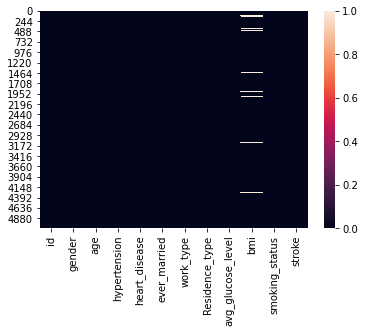

In [ ]:
# Visualisation des valeurs manquantes

sb.heatmap(data.isna())

In [ ]:
# Variables prédictives  et variable cible
print("------------------------------------------------------------------------------------------------------------------------------ ")
print("Features :")
print("------------------------------------------------------------------------------------------------------------------------------ ")
for i in data.columns[:-1]:
  print(i)
print("------------------------------------------------------------------------------------------------------------------------------ ")
print("Target :",data.columns[-1])
print("------------------------------------------------------------------------------------------------------------------------------ ")

------------------------------------------------------------------------------------------------------------------------------ 
Features :
------------------------------------------------------------------------------------------------------------------------------ 
id
gender
age
hypertension
heart_disease
ever_married
work_type
Residence_type
avg_glucose_level
bmi
smoking_status
------------------------------------------------------------------------------------------------------------------------------ 
Target : stroke
------------------------------------------------------------------------------------------------------------------------------ 


In [ ]:
# Statistiques Descriptives 
# Nous allons visualisé la ditribution de nos variables

In [ ]:
# On rappel que nous avons :
data.dtypes.value_counts()

object     5
int64      4
float64    3
dtype: int64

In [ ]:
# Fonctions de visualisation de la  Distribution des variables continues et catégorielles

def dist_int():
  j=0
  for i in data.select_dtypes("int"):
    #fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 10))
    sb.distplot(data[i],color="g")
    plt.title(i)
    plt.figure()
    j+=1
def hist_int():
  for i in data.select_dtypes("int"):
    #fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 10))
    sb.histplot(data[i],color="r")
    plt.title(i)
    plt.figure()
def dist_f():
  for i in data.select_dtypes("float"):
    sb.displot(data[i],color="g",label=i)
    plt.title(i)
    plt.legend()
    plt.figure()
def hist_f():
  for i in data.select_dtypes("float"):
    sb.histplot(data[i],color="y")
    plt.title(i)
    plt.figure()
# Distribution des variables catégorielles 

def  dist_obj():
  for i in data.select_dtypes("object"):
    sb.countplot(data[i],color="b",label=i)
    plt.title(i)
    plt.legend()
    plt.figure()



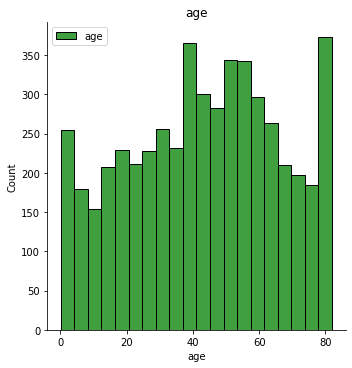

<Figure size 432x288 with 0 Axes>

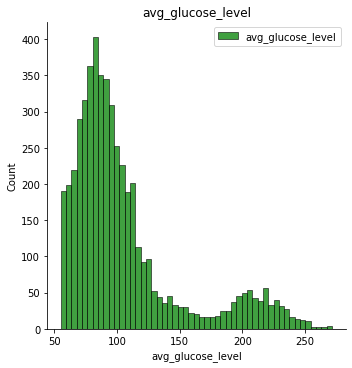

<Figure size 432x288 with 0 Axes>

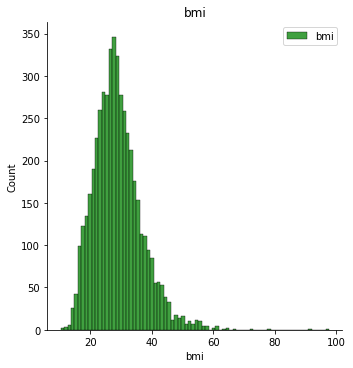

<Figure size 432x288 with 0 Axes>

In [ ]:
# Visualisation des distributions
dist_f()

In [ ]:
# L'age est bien distribué
# Le BMI n'est pas bien distribué car Un BMI normal est compris entre 18,5 et 25 source:https://sante.journaldesfemmes.fr/fiches-sante-du-quotidien/2441413-calcul-imc-formule-femme-homme-enfant-norme-indice-de-masse-corporelle/#:~:text=Un%20IMC%20normal%20est%20compris,%2C%20on%20parle%20d'ob%C3%A9sit%C3%A9.
# Le BMI contient probablement des valeurs abérantes
# En moyenne un homme a moins de 140Mg/l de glucose dans son sang donc l'avg_glucose_level est bien ditribué source:https://www.federationdesdiabetiques.org/information/glycemie

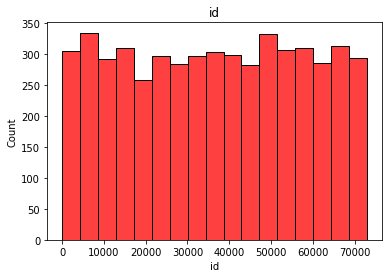

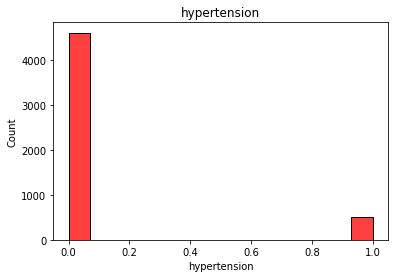

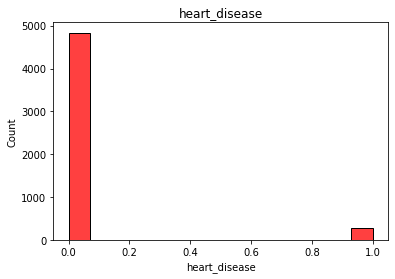

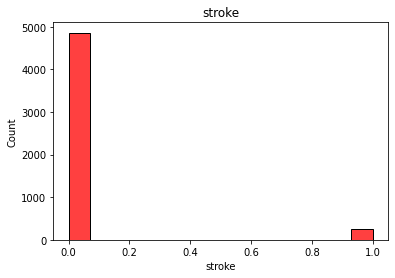

<Figure size 432x288 with 0 Axes>

In [ ]:
hist_int()

In [ ]:
# Nous avons moins de 15% de personnes ayant l'hypertension 
# moins de 10% souffrant de problèmes cardiaques 
# 5% environ de personnes  souffrent  d'avc

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

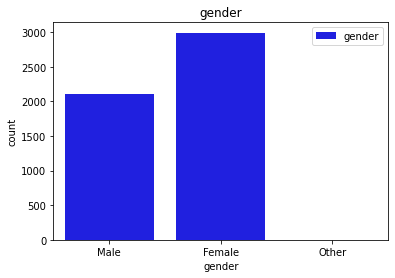

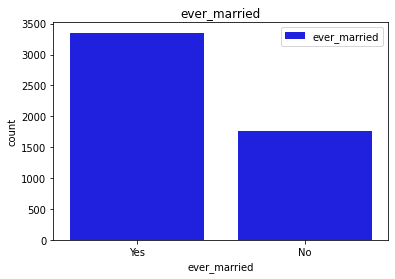

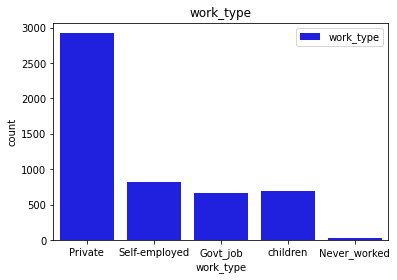

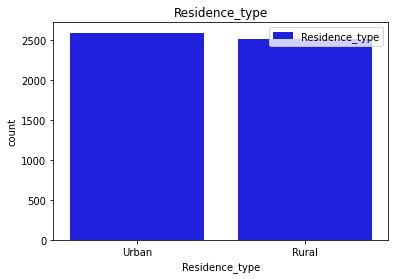

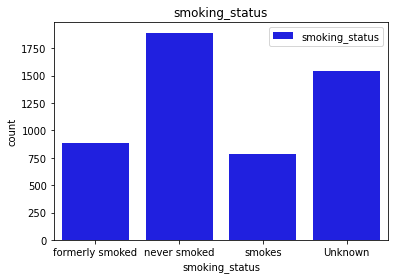

<Figure size 432x288 with 0 Axes>

In [ ]:
dist_obj()

In [ ]:
# Nous avons environ 44% d'hommes et 56% de femmes dans ce dataset
# 3400 personnes environs ont été déja marié et 1700 environs ne l'ont jamais été
# La pluspart des personnes travaillent dans le privé et nous jamais fumé
# Les personnes vivent aussi bien en ville qu'en milieur rural

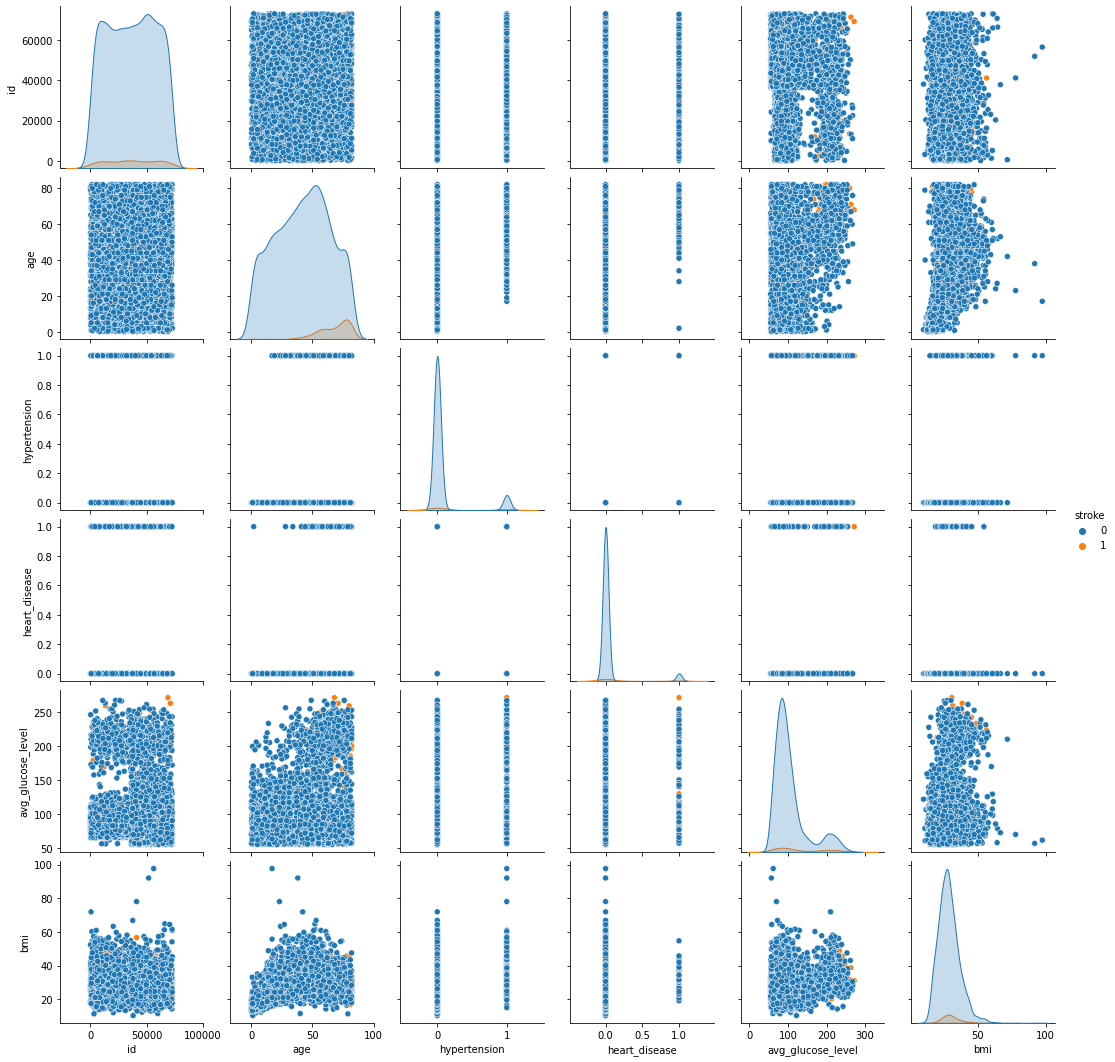

In [ ]:
# Visualisation globale 
sb.pairplot(data, hue='stroke')

In [ ]:
# Variance des variables
print(data.var())
# L'age a la plus grosse variance , et stroke la lus faible

id                   4.478185e+08
age                  5.113318e+02
hypertension         8.797552e-02
heart_disease        5.110447e-02
avg_glucose_level    2.050601e+03
bmi                  6.168636e+01
stroke               4.636264e-02
dtype: float64


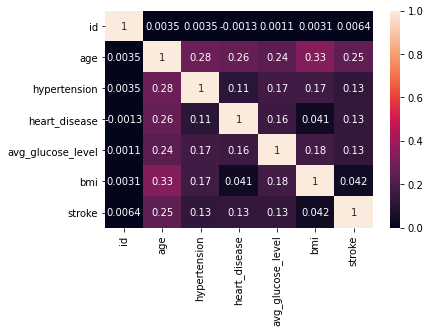

In [ ]:
# Matrice de correlation

sb.heatmap(data.corr(),annot=True)

In [ ]:
# Nous n'avons pas de très fortes correlations entre les variables néanmoins les variables sont modestement correlés  :
# Ainsi la variable age a une relation linéaire avec les variables x in [hypertension,heart_disease,avg_glucose,bmi,stroke]


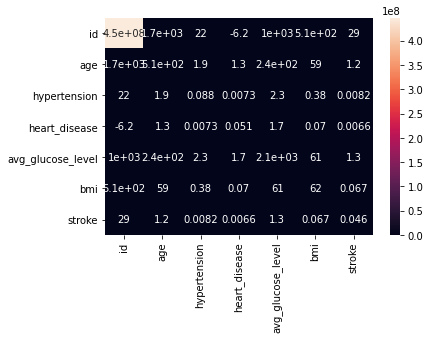

In [ ]:
# Matrice de covariance
sb.heatmap(data.cov(),annot=True)

In [ ]:
# Nous avons pratiquement les memes interprétations qu' avec la matrice de corrélation

In [ ]:
#Hypothèses: hypertension,heart_disease,avg_glucose,bmi,stroke,age sont correlés
# Nous allons vérifié notre hypothese

In [ ]:
# Croissement de données des variables hypertension , stroke
pd.crosstab(data["hypertension"],data["stroke"])


stroke,0,1
hypertension,,
0,4429,183
1,432,66


In [ ]:
# 4420 personnes nont  ni l'avc ni l'hypertension
# Parmi ceux qui s'ont atteints de l'avc 183 n'ont pas l'hypertension et 66 en souffrent
# Conclusion : L'hypertension n'induit pas systématiquement l'avc mais il peut constituer un facteur

In [ ]:
# Croissement de données des variables Age , stroke
pd.crosstab(data["age"],data["stroke"]).head(1000)


stroke,0,1
age,,
0.08,2,0
0.16,3,0
0.24,5,0
0.32,5,0
0.40,2,0
...,...,...
78.00,81,21
79.00,68,17
80.00,53,17


In [ ]:
# On remarque que plus l'age augmente plus les personnes ont l'avc
# l'age est donc une une variable importante en matière de prédiction de l'avc


In [ ]:
#Croissement de données des variables Heart_disease , stroke
pd.crosstab(data["heart_disease"],data["stroke"])


stroke,0,1
heart_disease,,
0,4632,202
1,229,47


In [ ]:
# On peut déduire que ceux qui ont l'avc n'ont pas généralement des problèmes de coeurs 
# Ainsi les problèmes de coeur n'induisent pas systématiquement à un avc mais constituent des facteurs 

In [ ]:
#Croissement de données des variables avg_glucose , stroke

plt.figure()
pd.crosstab(data["avg_glucose_level"],data["stroke"])

stroke,0,1
avg_glucose_level,,
55.12,1,0
55.22,1,0
55.23,1,0
55.25,1,0
55.26,1,0
...,...,...
266.59,1,0
267.60,1,0
267.61,1,0


<Figure size 432x288 with 0 Axes>

In [ ]:
# avg_glucose_level n est pas déterminant quant à la prédiction de l'avc mais peut peut-etre constitué un facteur

In [ ]:
#Croissement de données des variables bmi , stroke
# le surpoids correspond à un bmi>25 source:https://sante.journaldesfemmes.fr/fiches-sante-du-quotidien/2441413-calcul-imc-formule-femme-homme-enfant-norme-indice-de-masse-corporelle/#:~:text=Un%20IMC%20normal%20est%20compris,%2C%20on%20parle%20d'ob%C3%A9sit%C3%A9.
pd.crosstab(data["bmi"]>25,data["stroke"]==1)

stroke,False,True
bmi,,
False,1730,78
True,3131,171


In [ ]:
# Il y a donc 2,19 fois de risque de souffrir d'avc quand on est en surpoids

In [ ]:
# 3- Conclusion de l'analyse exploratire de données
# Ayant testé nos différentes hypothèses nous pouvons retenir les variables suivantes comme pertinentes: [hypertension,heart_disease,bmi,age]

In [ ]:
# Data preprocessing
# Nous allons traité les valeurs manquantes et les variables catégorielles

data["bmi"].isna().sum()

# Nous pouvons  Statisquement remplacé par la moyenne des bmi mais cela peut biaiser nos futurs prédictions ou nous pouvons supprimé les lignes manquantes et perdre de l'information
# Le choix est de supprimer les lignes manquantes
data=data.dropna(axis=0)

In [ ]:
# Vérification
print("Le nombre de valeurs manquantes après traitement est :",data["bmi"].isna().sum())
print("Nouvelles dimensions: ", data.shape)

Le nombre de valeurs manquantes après traitement est : 0
Nouvelles dimensions:  (4909, 12)


In [ ]:
# Transformation des Variables qualitatives  en variables quantitatives
from sklearn.preprocessing import LabelEncoder
encodeur= LabelEncoder()
for i in data.select_dtypes("object"):
  data[i]=encodeur.fit_transform(data[i])

In [ ]:
# vérification
data.dtypes
# Nous n'avons plus de variables catégorielles

id                     int64
gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

In [ ]:
# Filtre de features
new_features= ["hypertension","heart_disease","bmi","age","stroke"]

In [ ]:
# Nouveau DataSet
new_data= data[new_features]
new_data
print("Le jeu de données que nous utiliserons pour notre modele contient ",new_data.shape[0], " lignes","et",new_data.shape[1]," colonnes")

Le jeu de données que nous utiliserons pour notre modele contient  4909  lignes et 5  colonnes


In [ ]:
#  4- Entrainement de modèles de ML/DL et Evaluation du modèle grace aux métriques

In [ ]:
#Fonction Echantillonnage et normalisation 
def split(data):
  train,test=train_test_split(data,test_size=0.3)
  xtrain=train.iloc[:,:-1]
  xtest=test.iloc[:,:-1]
  ytrain=train["stroke"]
  ytest= test["stroke"]
  sc=StandardScaler()
  xtrain=sc.fit_transform(xtrain)
  xtest=sc.fit_transform(xtest)
  return xtrain,xtest,ytrain,ytest

In [ ]:
#Echantillonnage et normalisation 
xtrain,xtest,ytrain,ytest=split(new_data)

In [ ]:
# Modeles ML
arbre= DecisionTreeClassifier()
forest=RandomForestClassifier()
xgboost=GradientBoostingClassifier()
svm= SVC()
svm_lineaire=LinearSVC()
knn=KNeighborsClassifier()
lreg=LogisticRegression()
modeles={"1":DecisionTreeClassifier(),"2":RandomForestClassifier(),"3":GradientBoostingClassifier(),"4":SVC(),"5":LinearSVC(),"6":KNeighborsClassifier(),"7":LogisticRegression()}
for i in modeles.values():
  print(i)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
GradientBoostingClassifier

In [ ]:
for i in modeles.values():
  i.fit(xtrain,ytrain)
  print("modele : ",i)
  print("score:",i.score(xtrain,ytrain))
  print("ypredict")
  y=i.predict(xtest)
  print(y)
  print("accuracy score", accuracy_score(y,ytest))
  print("conf matrice", confusion_matrix(y,ytest))
  print("conf matrice", classification_report(y,ytest))
 


modele :  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
score: 0.9947613504074505
ypredict
[0 0 1 ... 0 0 0]
accuracy score 0.9314324507807196
conf matrice [[1367   57]
 [  44    5]]
conf matrice               precision    recall  f1-score   support

           0       0.97      0.96      0.96      1424
           1       0.08      0.10      0.09        49

    accuracy                           0.93      1473
   macro avg       0.52      0.53      0.53      1473
weighted avg       0.94      0.93      0.94      1473

modele :  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
             

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


score: 0.9589639115250291
ypredict
[0 0 0 ... 0 0 0]
accuracy score 0.9531568228105907
conf matrice [[1402   60]
 [   9    2]]
conf matrice               precision    recall  f1-score   support

           0       0.99      0.96      0.98      1462
           1       0.03      0.18      0.05        11

    accuracy                           0.95      1473
   macro avg       0.51      0.57      0.52      1473
weighted avg       0.99      0.95      0.97      1473

modele :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
score: 0.9572176949941793
ypredict
[0 0 0 ... 0 0 0]
accuracy score 0.957909029192125
conf matrice [[1411   62]
 [   0    0]]
conf matrice               precision    recall  f1-score   support

   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Le meilleur modele semble etre le RandomForestClassifier avec 0.9947613504074505 sur le train et  0.949 sur le test
# Toutefois nous devons faire une validation croisée pour déciser du modele à utliser finalement

In [ ]:
#  5- Validation croisée et courbe d'apprentissage
from sklearn.model_selection import learning_curve
def validation():

  for i in modeles.values():
    gamma,train_score,val_score=learning_curve(i,xtrain,ytrain,cv=5)  
    print("modele :",i)
    plt.plot(gamma,train_score.mean(axis=1),label="train")
    plt.plot(gamma,val_score.mean(axis=1),label="test")

    plt.legend()
    plt.figure()
    plt.show()

modele : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


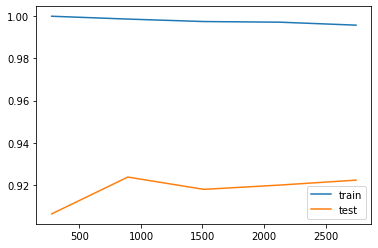

<Figure size 432x288 with 0 Axes>

modele : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


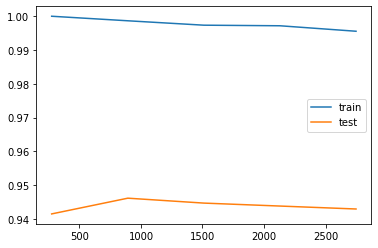

<Figure size 432x288 with 0 Axes>

modele : GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


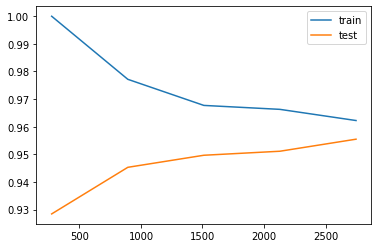

<Figure size 432x288 with 0 Axes>

modele : SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


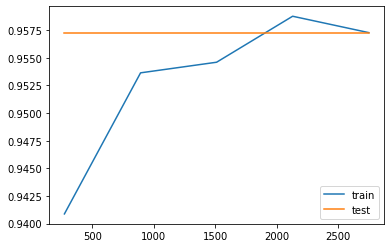

<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


modele : LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


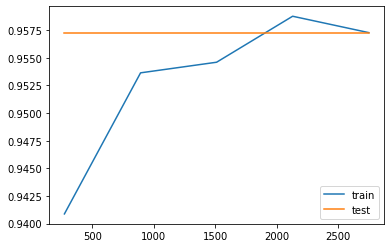

<Figure size 432x288 with 0 Axes>

modele : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


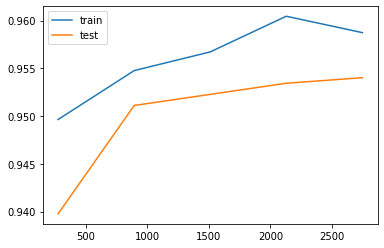

<Figure size 432x288 with 0 Axes>

modele : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


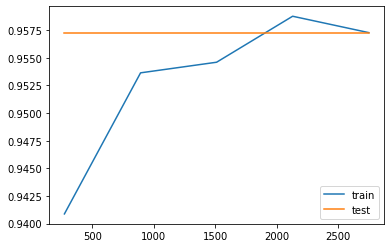

<Figure size 432x288 with 0 Axes>

In [ ]:
validation()

In [ ]:
# DecisionTreeClassifier RandomForestClassifier KNeighborsClassifier sont en overderfiting
# le SVC,LinearSVC 
# le meilleur modele est le kneighbor


In [ ]:
# prediction
prediction=modeles["6"].predict(xtest)

In [ ]:
serie=pd.Series(prediction)

In [ ]:
print(serie.value_counts())

0    1462
1      11
dtype: int64


In [ ]:
 6- Conclusion
# Soit 11 cas de avc et 1462 cas sains 
modeles

{'1': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 '2': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
